# 多項式迴歸 (Polynomial Regression)

Linear regression requires the relation between the dependent variable and the independent variable to be *linear*. 
However, it is not always the case.  
For example, in the Boston housing dataset, the relation between LSTAT and price is not linear.    
We can use *polynomial regression* to capture the nonlinear relationship between $x$ (e.g., LSTAT) and $y$ (e.g., price).

Polynomial regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an $n$th degree polynomial in $x$. Polynomial regression fits a nonlinear relationship between the value of $x$ and the corresponding conditional mean of $y$.

有時候，我們要預測的應變量不見得和自變量呈現一「直線」的關係。

例如在波士頓房價的例子中，房價則和「人口中低收入的比率」(LSTAT) 是呈現負相關，而且不是平滑直線的關係。

我們把房價和 LSTAT 的散佈圖畫出來，可以更清楚地觀察到這種現象。


## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

這裏我們採用 `bostonhousing.csv` 這個資料集。

本資料集中和 ML01 中資料集 (即 `'Boston_HousingData.csv'`) 最大的不同處在於本資料集中 <font color = "red">**沒有**</font>  缺失值 (NaN values)。

The meaning of each column is as follows (每個欄位的意思如下)：

- CRIM: per capita crime rate by town (人均犯罪率)
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft. (規劃住宅用地超過 25000 平方英尺的比例)
- INDUS: proportion of non-retail business acres per town (非零售業的比例)
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) (查爾斯河虛擬變數) (=1 代表大片土地，否則為 0)
- NOX: nitric oxides concentration (parts per 10 million) (氮的氧化物濃度(1000萬分之一))
- RM: average number of rooms per dwelling (平均每人所住房間數)
- AGE: proportion of owner-occupied units built prior to 1940  (1940 年前自用住宅比例)
- DIS: weighted distances to five Boston employment centres (到達 5 個波士頓就業中心的加權距離)
- RAD: index of accessibility to radial highways (到達 radial highways 的系數)
- PTRATIO: pupil-teacher ratio by town (城填師資比例)
- TAX: full-value property-tax rate per $10,000 (每 10,000 元的產權稅率)

- B:1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (城填中黑人的比例)
- LSTAT    % lower status of the population (低端人口的比例)
- MEDV     Median value of owner-occupied homes in $1000's (自用住宅價格的中位數 (1000美元))

In [2]:
bodf = pd.read_csv('bostonhousing.csv')
bodf.head(8)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1


## Draw the scatter plot

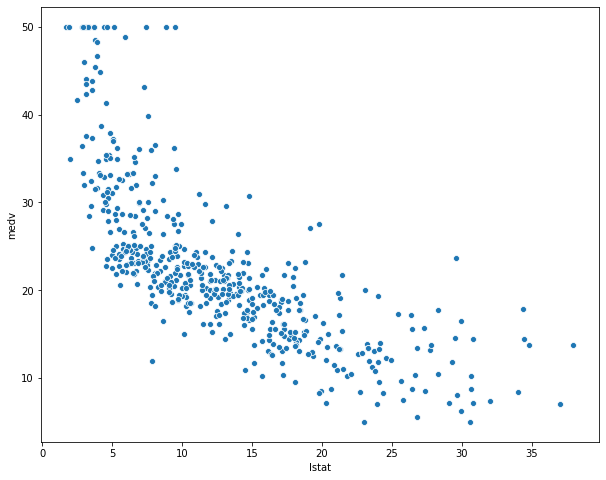

In [3]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = bodf.lstat, y = bodf.medv)


## Draw the regression line 

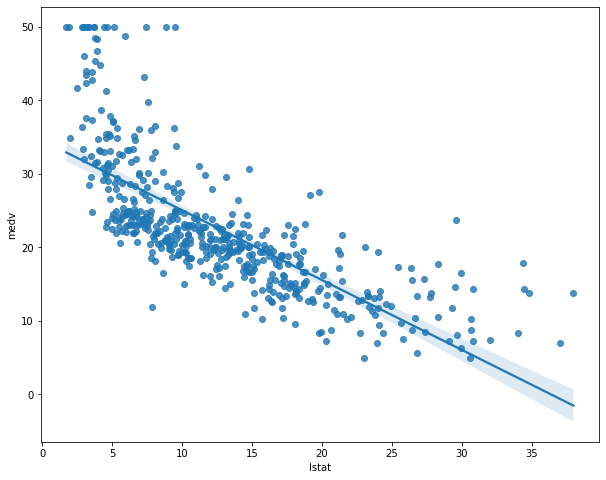

In [4]:
plt.figure(figsize=(10, 8))
sns.regplot(x = bodf.lstat, y = bodf.medv)

From the above figure, we can see that the linear model did not fit the data very well.

In the following, we try to fit the data using *second order* polynomial form.

由上圖可以看出來，這條直線迴歸線沒有 fit 得很好。

下面改用二次曲線來作圖。



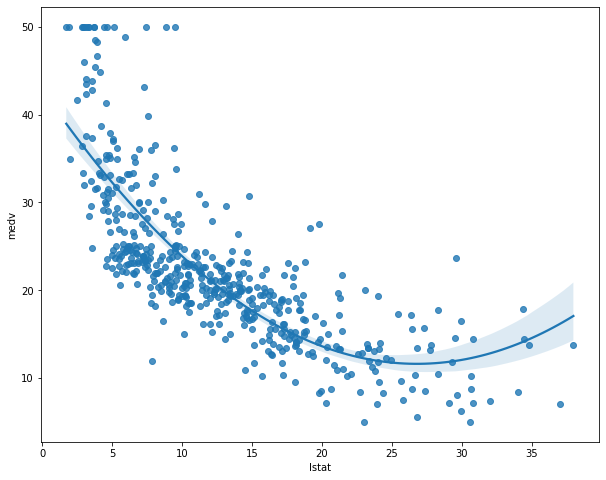

In [16]:
# 請 seaborn 以直線迴歸的方式畫出二次迴歸線
# order=2 means that we use the second order polynomial form.
plt.figure(figsize=(10, 8))
sns.regplot(x = bodf.lstat, y = bodf.medv, order=2 )

Parameter $order$ indicates the order of the polynomial regression.

The second order equation:  
$MEDV = \beta_0 + \beta_1 \times LSTAT + \beta_2 \times LSTAT^2$

The third order equation:
$MEDV = \beta_0 + \beta_1 \times LSTAT + \beta_2 \times LSTAT^2 + \beta_3 \times LSTLAT^3$.

The general form of the $k$-th order polynomial regssion.  
$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_k x^k$.

前述的 order 參數，可以指定 seaborn 用 $k$ 次曲線來 fit 資料。

在我們的例子中，我們指定 $order = 2$，所以是用 2 次曲線來 fit。

2 次曲線方程式：

$MEDV = \beta_0 + \beta_1 \times LSTAT + \beta_2 \times LSTAT^2$

如果是 3 次的曲線方程式的話，就是  
$MEDV = \beta_0 + \beta_1 \times LSTAT + \beta_2 \times LSTAT^2 + \beta_3 \times LSTLAT^3$.

它的第 $k$ 階通式為  
$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_k x^k$.

## Use sub-plot to list two figures at the same time

我們使用 `子圖 (subplot)` 的方式，將一次式，以及二次式的圖並列參考。

`plt.subplot(1,2,1)` means to create a figure conaining two sub figures (1 row and 2 columns).

The first two parameters (i.e., (1,2)) indicate the number of rows/columns of the subplot grid. 

In this example, there are one row and two columns in the grid (see the following figure).

The third parameter (i.e., 1) indicates that we are currently plotting the first sub-figure.

<table align="left">
    <tr>
        <td>fig1 </td>
        <td> fig2 </td>
    </tr>    
</table> 
<br/>  <br/>  




`plt.subplot(1,2,1)` 的意思是建立一張大圖，其包含了兩張子圖。

第 1 及 2 個參數代表子圖以一個 row，兩個 columns 的方式來安排 (見上面的表格)。

第 3 個參數代表目前正在畫第 1 個子圖。

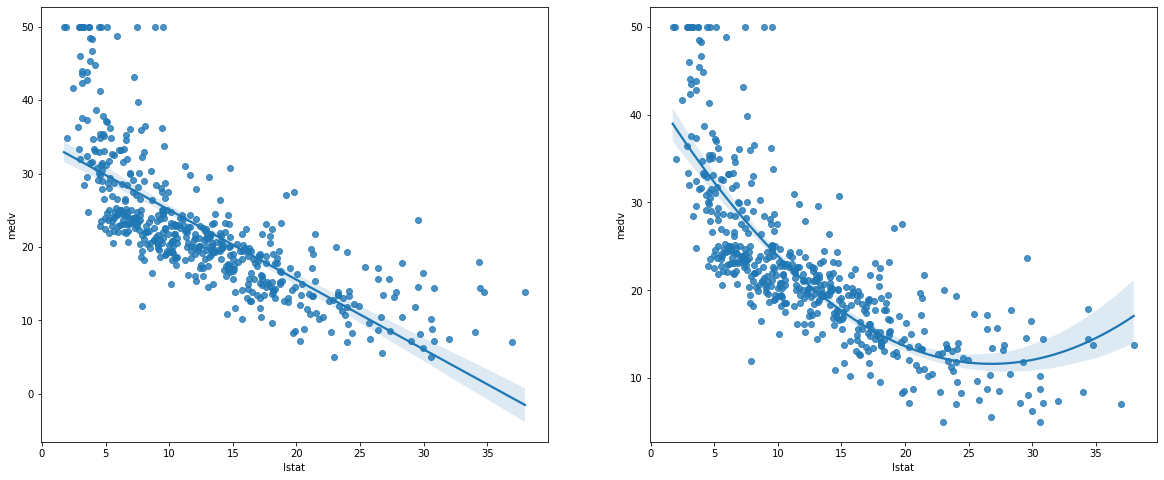

In [18]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1) 
sns.regplot(x = bodf.lstat, y = bodf.medv)
plt.subplot(1,2,2)
sns.regplot(x = bodf.lstat, y = bodf.medv, order=2 )

## 使用簡單線性迴歸的方式來 fit 模型

We first use simple linear regression to build the prediction model.

我們先用簡單線性迴歸來 fit 模型

## Split the dataset into training set and test set

將資料集切成訓練集，測試集

In [19]:
X = bodf[['lstat']]
Y = bodf[['medv']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)



## Fit the regression model

In [20]:
# 匯入 linear regression 的套件
from sklearn  import linear_model
reg1 = linear_model.LinearRegression()
reg1.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluate the performance of the model

評估訓練的結果

In [23]:
from sklearn.metrics import r2_score
print("直線迴歸：測試集的 R square 值")
y_pred = reg1.predict(X_test)
print(r2_score(y_test, y_pred))


直線迴歸：測試集的 R square 值
0.5151425477523661


In [24]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE is %.2f" % (mse))
print("RMSE is %.2f" % ((mse**0.5)))

MSE is 38.66
RMSE is 6.22


## Use polynomial regression model

使用多項式迴歸

`PolynomialFeatures` generates polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are $[1, a, b, a^2, ab, b^2]$.

The document of PolynomialFeatures can be found in [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

Import parameters:

- degree: The degree of the polynomial features. Default = 2. 產生多少指數次方的資料，預設是產生到 2 次方項。若 degress 指定為 2，那就會建構出 2 次方向 ($b^2$) 的資料。
- include_bias: If True (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model). 是否要產生常數項的資料。預設是 True，代表要產生常數項。如果指定為 False，那常數項的部分就不產生。

In [25]:
X_train.head(5)

,lstat
394,16.35
194,4.38
477,24.91
461,14.65
160,5.50


In [26]:
# Use PolynomialFeatures object to generate lstat^2
# 使用 PolynomialFeatures 物件來建立 lstat^2 的資料
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly_reg.fit_transform(X_train)
print(X_poly)

[[  16.35    267.3225]
 [   4.38     19.1844]
 [  24.91    620.5081]
 [  14.65    214.6225]
 [   5.5      30.25  ]
 [  13.34    177.9556]
 [  21.78    474.3684]
 [  15.1     228.01  ]
 [  21.14    446.8996]
 [  11.66    135.9556]
 [   9.43     88.9249]
 [  16.23    263.4129]
 [  14.52    210.8304]
 [   9.8      96.04  ]
 [  11.64    135.4896]
 [  18.66    348.1956]
 [   5.08     25.8064]
 [   9.5      90.25  ]
 [   5.99     35.8801]
 [   4.45     19.8025]
 [  16.22    263.0884]
 [  23.98    575.0404]
 [  11.25    126.5625]
 [   5.7      32.49  ]
 [  11.5     132.25  ]
 [   3.16      9.9856]
 [   6.21     38.5641]
 [   9.5      90.25  ]
 [  14.13    199.6569]
 [   5.98     35.7604]
 [   3.01      9.0601]
 [   8.16     66.5856]
 [  11.69    136.6561]
 [   7.26     52.7076]
 [   6.62     43.8244]
 [  27.8     772.84  ]
 [   6.43     41.3449]
 [  14.1     198.81  ]
 [   5.9      34.81  ]
 [  10.58    111.9364]
 [  12.14    147.3796]
 [   6.53     42.6409]
 [   9.54     91.0116]
 [  18.05  

## Train the polynomial regression model

In [13]:
reg2 = linear_model.LinearRegression()
reg2.fit(X_poly, y_train)
print(reg2.intercept_)
print(reg2.coef_)


[43.62385628]
[[-2.45931414  0.04772839]]


In [14]:
print("二次曲線迴歸：測試集的 R square 值")
X_test_poly = poly_reg.fit_transform(X_test)
y_pred = reg2.predict(X_test_poly)
print(r2_score(y_test, y_pred))

二次曲線迴歸：測試集的 R square 值
0.5967734963163207


In [15]:
mse = mean_squared_error(y_test, y_pred)
print("MSE is %.2f" % (mse))
print("RMSE is %.2f" % ((mse)**0.5))

MSE is 32.16
RMSE is 5.67


由上面的分析來看，可以看出以 2 次曲線來解釋 MEDV 會有較好的解釋性。

## How well the model does when $k$ is varied from 2 to 30

In the following, we vary $k$ from 2 to 30 to see the impact of $k$.

底下，我們看看當 order $k$ 由 2 變化到 30 時，模型效能的變化。

In [41]:
rsquare = [] # a buffer to store r2_score (用來存 r2_score 的空間)
mses = [] # a buffer to store mse
rmses = [] # a buffer to store rmse
ks = [] # a buffer to store k value
trainmses = []
for k in range(2, 30):
    poly_reg = PolynomialFeatures(degree = k, include_bias=False)
    X_poly = poly_reg.fit_transform(X_train)
    model = linear_model.LinearRegression()
    model.fit(X_poly, y_train)
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y_train, y_pred)
    trainmses.append(mse)
    
    X_test_poly = poly_reg.fit_transform(X_test)
    y_pred = model.predict(X_test_poly)
    rsquare.append(r2_score(y_test, y_pred))
    
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)
    rmses.append(mse**0.5)
    ks.append(k)

# put all the data into a dataframe
# 將前面 for 迴圈中所產生的資料，都放到dataframe 中
tmpdf = pd.DataFrame({
    'k': ks,
    'RSquare': rsquare,
    'MSE':mses,
    'RMSE':rmses,
    'trainMse':trainmses
})
# show the dataframe
tmpdf

,k,RSquare,MSE,RMSE,trainMse
0,2,0.596773,3.215521e+01,5.670557,29.534204
1,3,0.614245,3.076194e+01,5.546345,27.980817
2,4,0.642799,2.848491e+01,5.337125,27.299577
3,5,0.642985,2.847009e+01,5.335737,26.451305
4,6,0.646993,2.815045e+01,5.305700,26.422391
5,7,0.647266,2.812867e+01,5.303647,26.422267
6,8,0.617694,3.048693e+01,5.521497,26.138007
7,9,0.630944,2.943027e+01,5.424967,26.124284
8,10,0.581693,3.335780e+01,5.775621,26.159365
9,11,0.602244,3.171900e+01,5.631962,27.583129


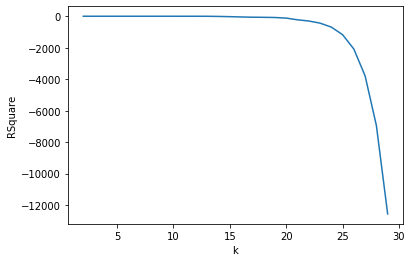

In [40]:
sns.lineplot(x = tmpdf.k, y = tmpdf.RSquare)

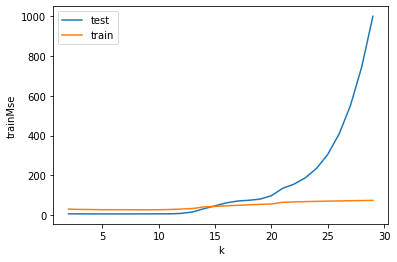

In [43]:
sns.lineplot(x = tmpdf.k, y = tmpdf.RMSE, label='test')
sns.lineplot(x = tmpdf.k, y = tmpdf.trainMse, label='train')